# BEBI5009 Homework 3

Student: Shao-Ting Chiu

Student ID: B03901045

Source Code on Github: https://github.com/stevengogogo/BEBI-5009-Mathematical-Biology

Reference: B. P.Ingalls, Mathematical Modelling in Systems Biology : An Introduction, vol. 53, no. 9. 2014.

## Problem 1

<img src = "img/hw3_p1.png" alt='problem1'>

Sol:

Set $[P_1]$, $[P_2]$ as the concentration of two free-form ligand binding sites of same protein. The following equations demeonstrate the relation:

$$P_1 + X \leftrightarrow P_1X$$

$$P_2 + X \leftrightarrow P_2X$$

where X represents the ligand.
Rewrite this equation to mathematical form:

$$[P_1X] = [P_1][X]/K_1$$
$$[P_2X] = [P_2][X]/K_2$$

Where $K_1$ and $K_2$ are the dissociation constants for the two sites. Because both ligand binding sites are located in the same protein, the totoal concentration of ligand binding site $P_1$ is equal to the one of $P_2$

$$[P_1] + [P_1X] = [P_2] + [P_2X]$$

Then, we want to derive the fractional saturation Y based on the above relations:

$$\begin{aligned}
Y &= \frac{[P_1X]+[P_2X]}{1([P_1]+[P_2])+1([P_1X]+[P_2X])} \\
  &= \frac{[P_1X]+[P_2X]}{([P_1]+[P_1X]) + ([P_2]+[P_2X])} \\
  &= \frac{[P_1X]}{2([P_1]+[P_1X])} + \frac{[P_2X]}{2([P_2]+[P_2X])}\\
  &= \frac{[P_1][X]/K_1}{2([P_1]+[P_1][X]/K_1)} + \frac{[P_2][X]/K_2}{2([P_2]+[P_2][X]/K_2)} \\
  &= \frac{[X]/K_1}{2(1+[X]/K_1)} + \frac{[X]/K_2}{2(1+[X]/K_2)}
\end{aligned}$$

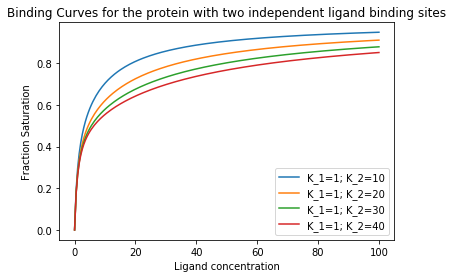

In [79]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

def saturation_ratio(x, dissociation_k):
    """
    Calculate the fraction saturation of specify x and dissociaton constant. The relation is derived from two independent ligand binding sites of same protein.
    Agrument:
                 x: ligand concentration
    dissociation k: dissociation constant
    """
    k1, k2 = dissociation_k
    
    # Calciulate the fraction saturation
    y = (x/k1)/(2*(1+(x/k1))) + (x/k2)/(2*(1+(x/k2))) 
    
    return y

x = np.linspace(0,100,200)
K = [[1,10],[1,20],[1,30],[1,40]]

for i in range(len(K)): 
    plt.plot(x, saturation_ratio(x,K[i]), label= 'K_1='+str(K[i][0])+'; K_2='+str(K[i][1]))
plt.title('Binding Curves for the protein with two independent ligand binding sites')
plt.legend()
plt.xlabel('Ligand concentration')
plt.ylabel('Fraction Saturation')
plt.show()


## Problem 2

<img src = "img/hw3_p2.png" alt='problem2'>

Sol:

First, write these relations in mathematical equations, and I assume $f(S_1)$ is the allosteric inhibiton function with 1 binding site:

$$\begin{aligned}
\frac{dS_1}{dt} &= V_1 + V_5 - V_3 \\
                &= V   + k_5S_2 - k_3S_1\\
                \\
\frac{dS_2}{dt} &= V_2 - V_5 - V_4 \\
                &= f(S_1) - k_5S_2 - k_4S_2 \\
                &= \frac{k_2}{1+S_1/K} - k_5S_2 - k_4S_2
\end{aligned}$$

Simulation:

Define the chemical reaction

In [80]:
def reaction(y, k):
    """
    Define the differential equations for the network system.
    Arguments:
            agent: Vector of chemical concentrations. agent= [s1, s2]
            t: time
            k: rate constants. k= [V, inhibit_k, k2, k3, k4, k5,]
    """
    s1, s2 = y
    v, inh_k, k2, k3, k4, k5 = k
    
    def f(s1, k2, inh_k):
        """
        Inhibition function f
        """
        return k2 / (1 + s1/inh_k)
    
    dfdt = [
            v + k5*s2 - k3*s1,
            f(s1, k2, inh_k) - k5*s2 - k4*s2
        ]
    
    return dfdt

Solve the Differential equation by [solve_ivp](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_ivp.html)

In [81]:
import numpy as np
from scipy.integrate import solve_ivp

# Initial condition and constants
v, inh_k, k2, k3, k4, k5 = 1, 1, 1, 1, 1, 1

# Pack up
y0s = [[0, 0], [0.5, 0.6], [0.17, 1.1], [0.25, 1.9], [1.85, 1.7]]
k = [v, inh_k, k2, k3, k4, k5]

# Time samples
T_INTERVAL = 0, 30

sols = [solve_ivp(lambda t,y: reaction(y, k), 
                  T_INTERVAL, y0, method="LSODA") for y0 in y0s]

Plot the results

[pyplot.steamplot](https://matplotlib.org/gallery/images_contours_and_fields/plot_streamplot.html) and [numpy.ogrid](https://docs.scipy.org/doc/numpy/reference/generated/numpy.ogrid.html)

1.Phase Portrait

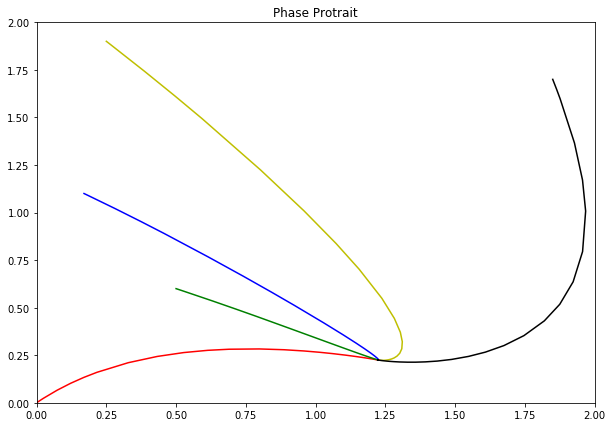

In [82]:
plt.figure(figsize=(10, 7))
plt.title("Phase Protrait")
plt.axis([0, 2, 0, 2])

# Plot phase portrait 
for sol, color in zip(sols, 'rgbyk'):
    plt.plot(sol.y[0], sol.y[1], color)

2.Direction Field

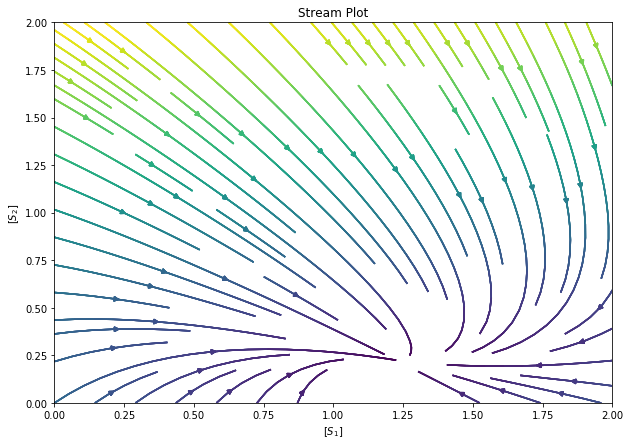

In [83]:
# Plot direction lines
plt.figure(figsize=(10, 7))
plt.title('Stream Plot')
plt.axis([0, 2, 0, 2])
yy, xx = np.ogrid[0:2:20j, 0:2:20j]
xdot, ydot = reaction([xx, yy], k)
for sol, color in zip(sols, 'rgbyk'):
    plt.streamplot(xx, yy, xdot, ydot, color=np.hypot(xdot,ydot), density=[1, 1])

plt.xlabel(r'$[S_1]$')
plt.ylabel(r'$[S_2]$')
plt.show()

3.Nullclines ($\frac{ds}{dt}=0$)

To find nullclines:

$$\begin{aligned}
\frac{dS_1}{dt} = 0 &= V +k_5S_2 - k_3S_1 \\
                S_2 &= \frac{V-k_3S_1}{-k_{5}} \\
                \\
\frac{dS_2}{dt} = 0 &= \frac{k_2}{1+S_1/K} - k_5S_2 - k_4S_2\\
                S_2 &= \frac{1}{k_5+k_4}\frac{k_2}{1+S_1/K}
\end{aligned}$$

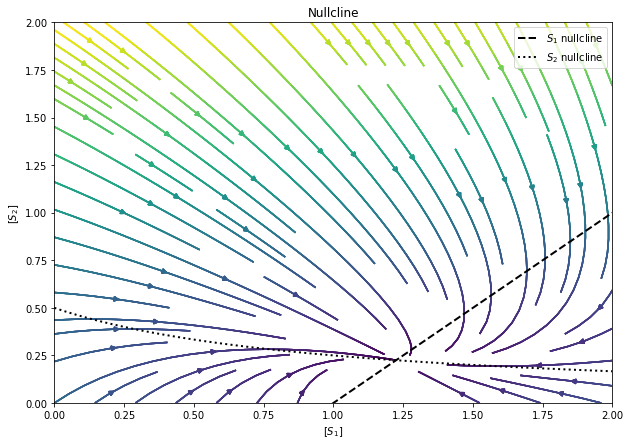

In [94]:
# Calculate nullcline of s1, s2
ns11 = np.linspace(0,2,100)
ns12 = (v-k3*ns11)/(-1*k5)
ns21 = np.linspace(0,2,100)
ns22 = k2/(1+ns21/inh_k)/(k5+k4)

# Plot nullcline
plt.figure(figsize=(10, 7))
plt.title('Nullcline')
plt.axis([0, 2, 0, 2])
plt.plot(ns11, ns12, 'k--', label='$S_1$ nullcline', linewidth=2)
plt.plot(ns11, ns22, 'k:', label='$S_2$ nullcline', linewidth=2)
for sol, color in zip(sols, 'rgbyk'):
    plt.streamplot(xx, yy, xdot, ydot, color=np.hypot(xdot,ydot), density=[1, 1])
plt.legend(loc=1)
plt.xlabel(r'$[S_1]$'); plt.ylabel(r'$[S_2]$')
plt.show()

There is only one intersection, so this system is not bistable

## Problem 3

<img src = "img/hw3_p3.png" alt='problem3'>

Sol:

<img src = "img/handwrite/h1.jpg" alt="handwrite1">
<img src = "img/handwrite/h2.jpg" alt="handwrite2">
<img src = "img/handwrite/h3.jpg" alt="handwrite3">

The meaning of equation 6.2:

In equation 6.2, the steady-state value of $w^{*}$ depends on the ratio of $k_{1}E_{1T}$ and $k_{2}E_{2T}$. When $K_1=K_2=0$, $k_{1}E_{1T}$ euqals to $k_{2}E_{2T}$. On the other hand, when $K_1=K_2\to\infty$, $\frac{k_{1}E_{1T}}{k_{2}E_{2T}}=\frac{K_{1}}{K_{2}}$  